In [1]:
import csv
import re
import pandas as pd
import functools as ft
import numpy as np
import calendar
import string
import matplotlib.pyplot as plt
import seaborn as sns
def open_csv(file_name):
    collection = []
    with open(file_name, 'r') as f:
        for line in csv.DictReader(f):
            collection.append(line)
        return collection
students_math = open_csv('student-mat.csv')
students_por = open_csv('student-por.csv')


In [2]:
df_port = pd.DataFrame(students_por)
df_math = pd.DataFrame(students_math)
df_combine = pd.concat([df_port,df_math])
df_combine = df_combine.reset_index()
df_combine.head()


,index,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,GP,F,18,U,GT3,A,4,4,at_home,...,4,3,4,1,1,3,4,0,11,11
1,1,GP,F,17,U,GT3,T,1,1,at_home,...,5,3,3,1,1,3,2,9,11,11
2,2,GP,F,15,U,LE3,T,1,1,at_home,...,4,3,2,2,3,3,6,12,13,12
3,3,GP,F,15,U,GT3,T,4,2,health,...,3,2,2,1,1,5,0,14,14,14
4,4,GP,F,16,U,GT3,T,3,3,other,...,4,3,2,1,2,5,0,11,13,13


In [3]:
df_combine['Dalc']= df_combine['Dalc'].apply(pd.to_numeric)
df_combine['Walc']= df_combine['Walc'].apply(pd.to_numeric)
df_combine.loc[df_combine['Dalc'] == 1]

,index,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,GP,F,18,U,GT3,A,4,4,at_home,...,4,3,4,1,1,3,4,0,11,11
1,1,GP,F,17,U,GT3,T,1,1,at_home,...,5,3,3,1,1,3,2,9,11,11
3,3,GP,F,15,U,GT3,T,4,2,health,...,3,2,2,1,1,5,0,14,14,14
4,4,GP,F,16,U,GT3,T,3,3,other,...,4,3,2,1,2,5,0,11,13,13
5,5,GP,M,16,U,LE3,T,4,3,services,...,5,4,2,1,2,5,6,12,12,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1032,383,MS,M,19,R,GT3,T,1,1,other,...,4,3,2,1,3,5,0,6,5,0
1034,385,MS,F,18,R,GT3,T,2,2,at_home,...,5,3,3,1,3,4,2,10,9,10
1036,387,MS,F,19,R,GT3,T,2,3,services,...,5,4,2,1,2,5,0,7,5,0
1037,388,MS,F,18,U,LE3,T,3,1,teacher,...,4,3,4,1,1,1,0,7,9,8


3.)Do more socially active students drink more? Check if the sociable students that have more freetime have a tendency to drink more.

In [4]:
df_GODA = df_combine.groupby('goout')['Dalc'].mean().reset_index()
df_GODA

,goout,Dalc
0,1,1.169014
1,2,1.306452
2,3,1.385075
3,4,1.616740
4,5,1.975460


In [5]:
df_GOWA = df_combine.groupby('goout')['Walc'].mean().reset_index()
df_GOWA

,goout,Walc
0,1,1.591549
1,2,1.778226
2,3,2.101493
3,4,2.629956
4,5,3.251534


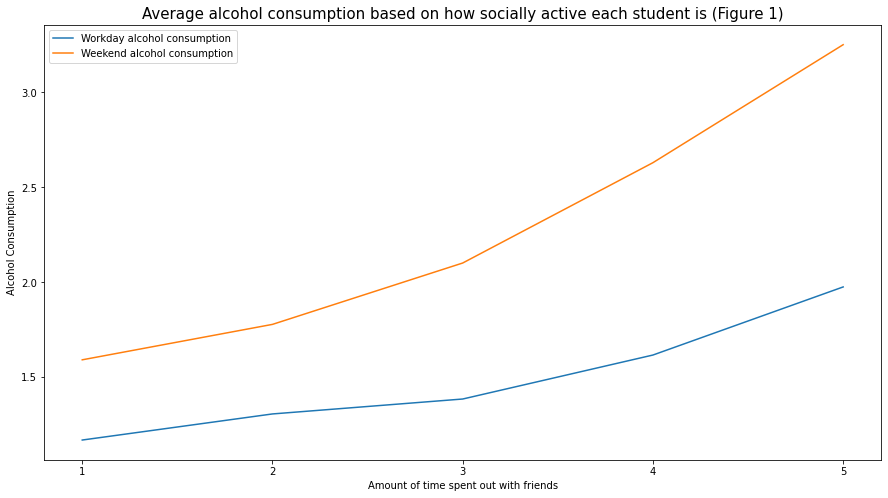

In [6]:
plt.figure(figsize=(15,8))
sns.lineplot(x=df_GODA["goout"], y=df_GODA["Dalc"])
sns.lineplot(x=df_GOWA["goout"], y=df_GOWA["Walc"])
plt.title("Average alcohol consumption based on how socially active each student is (Figure 1)", size=15)
plt.xlabel("Amount of time spent out with friends")
plt.ylabel("Alcohol Consumption")
plt.legend(["Workday alcohol consumption", "Weekend alcohol consumption"])

From the graph above we can see that on average the more time a students spends out with friends the more alcohol they consume. With this information we can then compare the freetime of students and see if that changes the amount of alcohol consumed.

In [7]:
df_SAFTD = df_combine.groupby(['goout','freetime'])['Dalc'].mean().reset_index()
df_SAFTD["gooutfreetime"]=df_SAFTD[['goout','freetime']].agg('-'.join,axis=1)
df_SAFTW = df_combine.groupby(['goout','freetime'])['Walc'].mean().reset_index()
df_SAFTW["goout-freetime"]=df_SAFTW[['goout','freetime']].agg('-'.join,axis=1)
df_SAFTW

,goout,freetime,Walc,goout-freetime
0,1,1,1.200000,1-1
1,1,2,1.909091,1-2
2,1,3,1.300000,1-3
3,1,4,1.666667,1-4
4,1,5,1.800000,1-5
5,2,1,1.541667,2-1
6,2,2,1.725806,2-2
7,2,3,1.862745,2-3
8,2,4,1.976190,2-4
9,2,5,1.333333,2-5


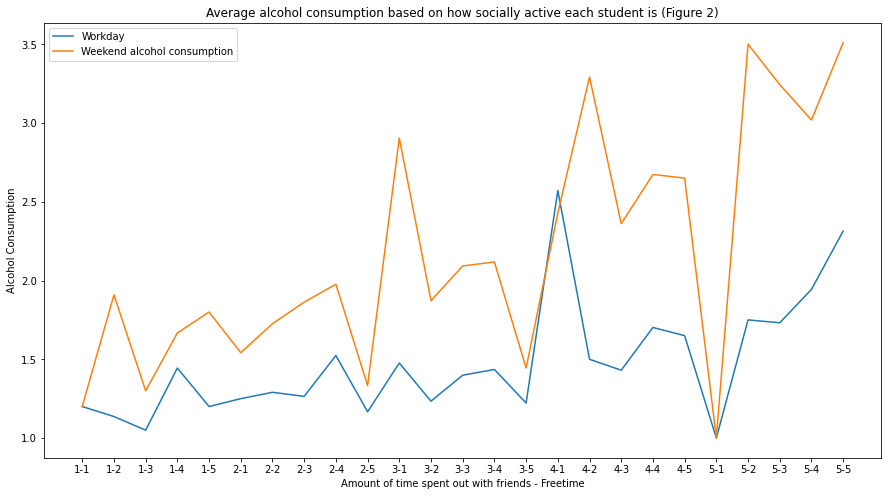

In [8]:
plt.rcParams["figure.figsize"] = (15,8)
sns.lineplot(x=df_SAFTD["gooutfreetime"], y=df_SAFTD["Dalc"])
sns.lineplot(x=df_SAFTD["gooutfreetime"], y=df_SAFTW["Walc"])
plt.title("Average alcohol consumption based on how socially active each student is (Figure 2)")
plt.xlabel("Amount of time spent out with friends - Freetime")
plt.ylabel("Alcohol Consumption")
plt.legend(["Workday", "Weekend alcohol consumption"])

After taking the average Alcohol levels per Time spent with friends - freetime, we can see theres not just one major trend among these results. Instead for each set of numbers from 1-5 we can see a steep increase in the start followed by a steep decline with some variation after that. This shows that there are many other factors that go into this besides just free time and how social a student is.

5.)How does drinking affect the students’ health? Compare the health of students that don’t drink to the health of students that do drink.

In [9]:
df_SHDA = df_combine.groupby('health')['Dalc'].mean().reset_index()
df_SHDA 

,health,Dalc
0,1,1.459854
1,2,1.390244
2,3,1.409302
3,4,1.522989
4,5,1.572152


In [10]:
df_SHWA = df_combine.groupby('health')['Walc'].mean().reset_index()
df_SHWA

,health,Walc
0,1,2.029197
1,2,2.268293
2,3,2.153488
3,4,2.275862
4,5,2.453165


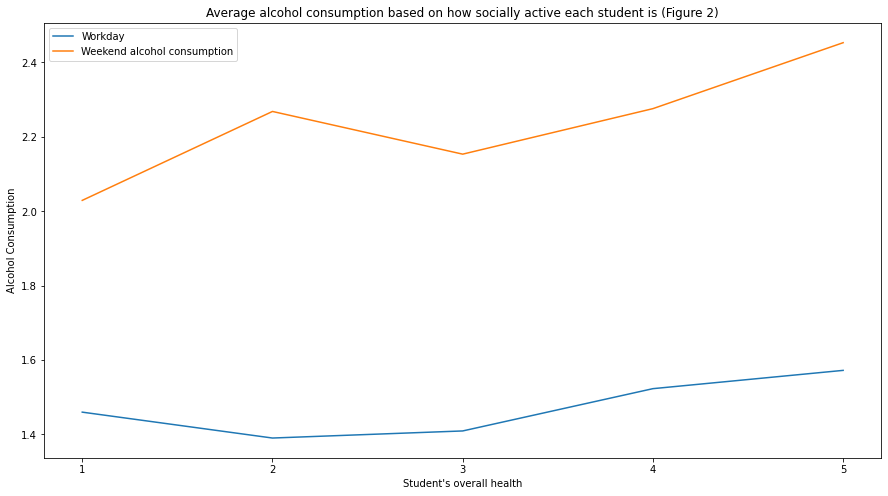

In [11]:
plt.rcParams["figure.figsize"] = (15,8)
sns.lineplot(x=df_SHDA["health"], y=df_SHDA["Dalc"])
sns.lineplot(x=df_SHWA["health"], y=df_SHWA["Walc"])
plt.title("Average alcohol consumption based on how socially active each student is (Figure 2)")
plt.xlabel("Student's overall health")
plt.ylabel("Alcohol Consumption")
plt.legend(["Workday", "Weekend alcohol consumption"])

When looking at the results shown by this graph we can see that on average students who consider themselves healthy tend to consume more alcohol. The only exception to this is for workday alcohol consumption for those who consider there health as 2 on the scale from 1-5.